# Universidad del Valle de Guatemala
## Security Data Science - 10
* Juan Manuel Marroquin Alfaro - 19845
* Carlos Alberto Raxtum Ramos - 19721
* Jose Abraham Gutierrez Corado - 19111
* Walter Danilo Saldaña Salguero - 19897
* Javier Alejandro Cotto Argueta - 19324

## Proyecto Fase 2: Selección de caracteristicas y limpieza de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
import itertools
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

from yellowbrick.cluster import SilhouetteVisualizer
from os import listdir
from os.path import isfile, join
import pandas_profiling
import os
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

C:\Users\JMarroquin\AppData\Local\Temp\ipykernel_26376\1509020744.py:27: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


## Normal Images

In [2]:
df1 = pd.read_csv('normal_images_info.csv', header = None)
df1.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,65536
693,692.0,80,79,78,80,80,81,81,81,81,...,165,167,169,174,171,163,167,166,165,161
951,950.0,23,23,24,23,24,24,24,24,26,...,69,98,113,121,126,128,128,126,111,103
719,718.0,57,63,54,57,50,48,51,50,39,...,25,25,24,24,24,26,26,27,28,28
601,600.0,65,65,65,66,65,64,63,62,61,...,83,115,132,144,152,149,146,144,136,92
994,993.0,165,167,163,164,165,167,168,168,177,...,107,106,105,107,101,108,113,110,107,111


### Observaciones del Dataframe de Imagenes Normales

In [3]:
df1.shape

(1001, 65537)

## Stego Images

In [4]:
df2 = pd.read_csv('infected_images_info.csv', header = None)
df2.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,65536
121,120.0,18,18,20,24,34,39,38,37,32,...,19,13,13,17,16,25,21,19,18,12
883,882.0,134,135,135,135,136,134,133,134,133,...,29,30,34,32,28,34,41,34,36,38
638,637.0,82,82,82,82,83,82,82,83,81,...,153,152,153,153,153,152,152,152,152,152
485,484.0,53,90,120,137,146,151,143,130,115,...,193,217,234,238,237,237,227,206,180,152
439,438.0,164,168,174,178,183,185,186,186,186,...,205,239,243,244,206,209,244,219,222,242


### Observaciones del Dataframe de Imagenes Alteradas

In [5]:
df2.shape

(1001, 65537)

## Dataframe Completo

Concatenación de los dataframes

In [6]:
#1 Si tiene 0 No tiene
df1['isInfected'] = 0
df2['isInfected'] = 1

df  = pd.concat([df1, df2])
df

,0,1,2,3,4,5,6,7,8,9,...,65528,65529,65530,65531,65532,65533,65534,65535,65536,isInfected
0,NaN,0,1,2,3,4,5,6,7,8,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,0
1,0.0,81,77,81,82,79,82,81,79,81,...,19,20,22,22,17,17,17,22,24,0
2,1.0,6,5,5,6,5,5,5,5,5,...,5,6,5,5,5,5,5,5,5,0
3,2.0,15,16,16,17,16,15,16,16,16,...,18,22,23,15,12,11,12,12,12,0
4,3.0,97,99,96,93,92,93,92,91,91,...,48,60,69,65,61,58,50,49,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,995.0,11,13,15,22,26,24,24,23,24,...,88,88,87,86,87,87,88,87,86,1
997,996.0,66,63,63,62,60,59,49,65,76,...,180,178,187,169,150,137,165,148,85,1
998,997.0,86,87,89,91,84,91,91,88,91,...,58,49,51,58,44,44,45,39,44,1
999,998.0,129,128,150,174,159,162,157,144,130,...,103,102,103,100,88,84,84,76,27,1


### Observaciones del Dataframe completo

In [7]:
df.shape

(2002, 65538)

Eliminamos la columna que guarda el indice dos veces por el método concat

In [8]:
del df[0]

Analisis Exploratorio

In [9]:
#profile = df.profile_report(title="EDM")
#profile.to_file(output_file="proyect_pandas_report.html")

Dado que el dataframe era muy grande, se tomo una pequeña muestra de los datos correspondientes entre los dos dataframe para realizar el modelo.

# Módelos DP/ML/RL

## Naive Bayes

Partimos el SET (entrenamiento 55%, validación 15%, prueba 30%)

In [10]:
X = df.drop(columns = ['isInfected']).copy()
y = df['isInfected']

#Dividiremos nuestros datos en dos gran conjuntos(entrenamiento y data restante)
x_train, x_rem, y_train, y_rem = train_test_split(X, y, train_size = 0.55, random_state = 0)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 654 to 684
Columns: 65536 entries, 1 to 65536
dtypes: int64(65536)
memory usage: 550.5 MB


In [11]:
#Dividiremos nuestros datos en dos gran conjuntos(validación y prueba)
#45% -> 100
#30% -> x
#x = 66.67
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size = 0.66, random_state = 0)
x_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 452 to 473
Columns: 65536 entries, 1 to 65536
dtypes: int64(65536)
memory usage: 153.0 MB


### Observaciones de los conjuntos de Entrenamiento, Validación y Prueba

In [12]:
print("X train shape: ", x_train.shape)
print("Y train shape: ", y_train.shape)
print("X valid shape: ", x_valid.shape)
print("Y valid shape: ", y_valid.shape)
print("X test shape: ", x_test.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (1101, 65536)
Y train shape:  (1101,)
X valid shape:  (306, 65536)
Y valid shape:  (306,)
X test shape:  (595, 65536)
Y test shape:  (595,)


Declaramos el Modelo

In [13]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

Metricas

In [14]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

print("Accuracy:", accuray)
print("F1 Score:", f1)
print("Precision", precision)
print("Recall", recall)

Accuracy: 0.4907563025210084
F1 Score: 0.6561859918713822
Precision 0.9931972789115646
Recall 0.4924114671163575


Matriz de Confusión

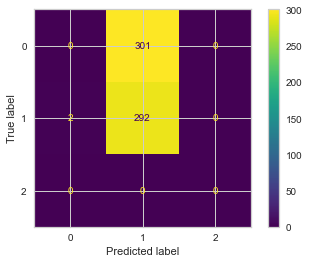

In [15]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,cross_val_score, cross_validate

### Cross Validation

In [17]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(gnb,x_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.49 accuracy with a standard deviation of 0.04


Podemos observar de que nuestro segundo modelo contiene un accuracy promedio de 0.49 de accuracy con una desviacion estandar de 0.04 que es muy similar al modelo anterior. Por lo que el modelo es capaz de predecir correctamente el casi la mitad de los datos de entrenamiento

## Gradient Boost Classifier

In [18]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(x_train, y_train)
y_pred = gbm.predict(x_test)

In [19]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

print("Accuracy:", accuray)
print("F1 Score:", f1)
print("Precision", precision)
print("Recall", recall)

Accuracy: 0.23697478991596638
F1 Score: 0.23824367884626138
Precision 0.2755102040816326
Recall 0.2515527950310559


### Cross Validation

In [20]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(gbm,x_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.26 accuracy with a standard deviation of 0.05


###  SVM model


In [21]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [22]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

print("Accuracy:", accuray)
print("F1 Score:", f1)
print("Precision", precision)
print("Recall", recall)

Accuracy: 0.23865546218487396
F1 Score: 0.23953431195224795
Precision 0.20068027210884354
Recall 0.21299638989169675


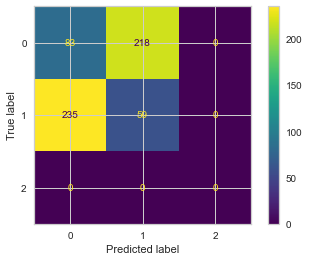

In [23]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

### Cross Validation

In [24]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(clf,x_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.27 accuracy with a standard deviation of 0.02
